In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: Generate a synthetic dataset
X, y = make_classification(
    n_samples=1000,  # Number of samples
    n_features=20,   # Total features
    n_informative=15,  # Number of informative features
    n_redundant=5,    # Number of redundant features
    n_classes=3,      # Number of classes
    random_state=42   # For reproducibility
)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Apply PCA
pca = PCA(n_components=10)  # Reduce to 10 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 3: Apply LDA
lda = LDA(n_components=2)  # Reduce to 2 components (n_classes - 1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Step 4: Apply ICA
ica = FastICA(n_components=10, random_state=42)  # Reduce to 10 components
X_train_ica = ica.fit_transform(X_train)
X_test_ica = ica.transform(X_test)

# Step 5: Train and Evaluate Classifier on PCA-reduced data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

# Train and Evaluate Classifier on LDA-reduced data
knn_lda = KNeighborsClassifier(n_neighbors=5)
knn_lda.fit(X_train_lda, y_train)
y_pred_lda = knn_lda.predict(X_test_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)

# Train and Evaluate Classifier on ICA-reduced data
knn_ica = KNeighborsClassifier(n_neighbors=5)
knn_ica.fit(X_train_ica, y_train)
y_pred_ica = knn_ica.predict(X_test_ica)
accuracy_ica = accuracy_score(y_test, y_pred_ica)

# Step 6: Print results
print("Classification Accuracy:")
print(f"PCA: {accuracy_pca:.2f}")
print(f"LDA: {accuracy_lda:.2f}")
print(f"ICA: {accuracy_ica:.2f}")


Classification Accuracy:
PCA: 0.72
LDA: 0.67
ICA: 0.73


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


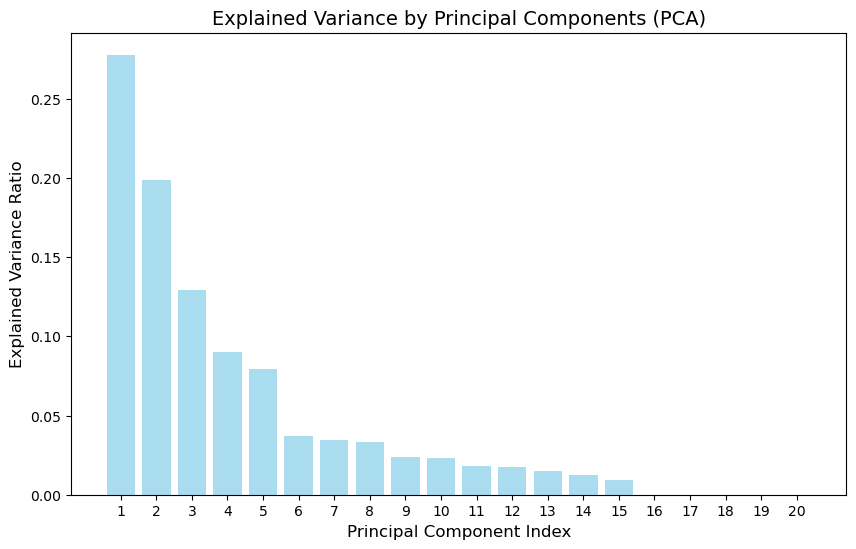

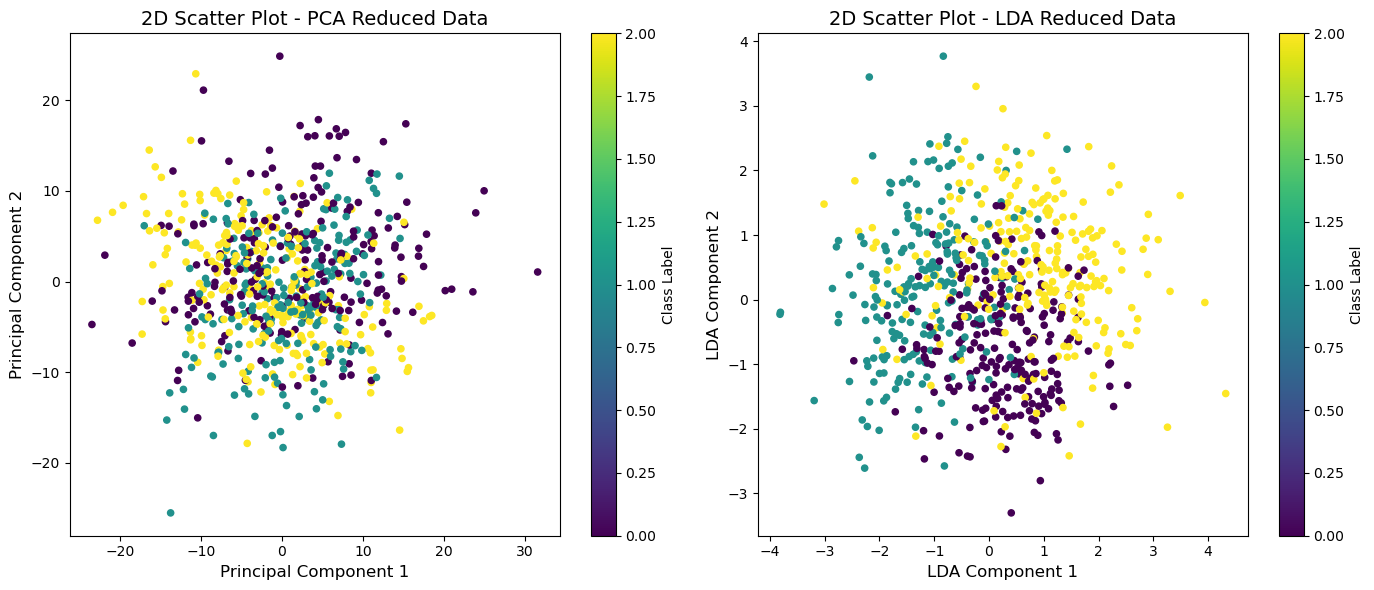

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


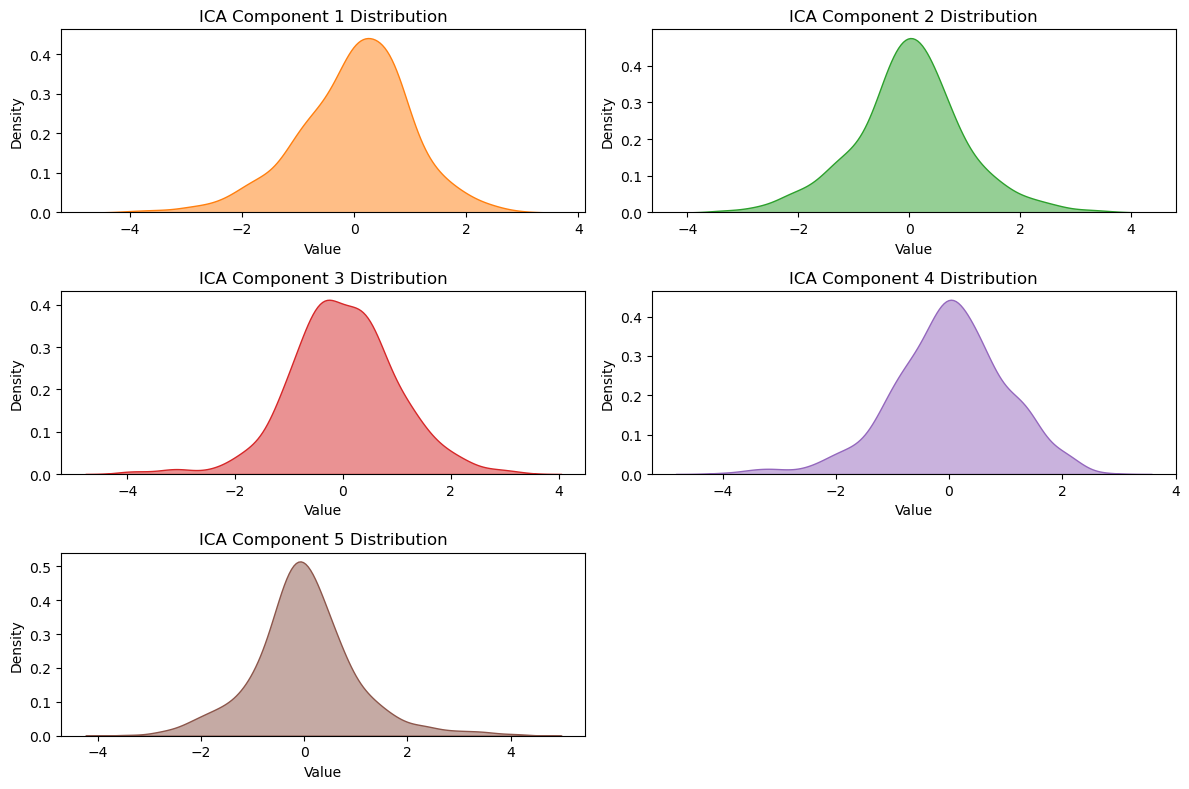

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23460\3478460395.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=techniques, y=accuracy_values, palette="muted")


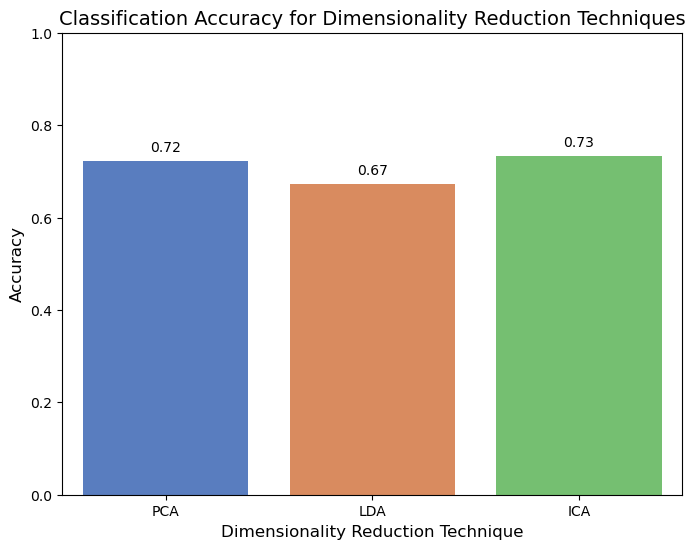

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Explained Variance for PCA
pca = PCA().fit(X_train)  # Fit PCA on the training data
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', color='skyblue')
plt.xlabel('Principal Component Index', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.title('Explained Variance by Principal Components (PCA)', fontsize=14)
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

# 2. 2D Scatter Plot for PCA and LDA
# PCA
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', s=20)
plt.title("2D Scatter Plot - PCA Reduced Data", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.colorbar(label='Class Label')

# LDA
plt.subplot(1, 2, 2)
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', s=20)
plt.title("2D Scatter Plot - LDA Reduced Data", fontsize=14)
plt.xlabel("LDA Component 1", fontsize=12)
plt.ylabel("LDA Component 2", fontsize=12)
plt.colorbar(label='Class Label')
plt.tight_layout()
plt.show()

# 3. Component Distributions for ICA
ica = FastICA(n_components=10, random_state=42).fit(X_train)
X_ica = ica.transform(X_train)

plt.figure(figsize=(12, 8))
for i in range(1, 6):  # Plot first 5 components
    plt.subplot(3, 2, i)
    sns.kdeplot(X_ica[:, i - 1], fill=True, alpha=0.5, color=f"C{i}")
    plt.title(f'ICA Component {i} Distribution', fontsize=12)
    plt.xlabel('Value', fontsize=10)
    plt.ylabel('Density', fontsize=10)
plt.tight_layout()
plt.show()

# 4. Classification Accuracy Comparison
accuracy_values = [accuracy_pca, accuracy_lda, accuracy_ica]
techniques = ['PCA', 'LDA', 'ICA']

plt.figure(figsize=(8, 6))
sns.barplot(x=techniques, y=accuracy_values, palette="muted")
plt.title("Classification Accuracy for Dimensionality Reduction Techniques", fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Dimensionality Reduction Technique', fontsize=12)
plt.ylim(0, 1)
for i, acc in enumerate(accuracy_values):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=10)
plt.show()
